##Induction Machine Design of the 270 kW Tesla Model S Motor
###Introduction
###Design Specifications
From [1], the rated speed of the motor can be obtained around 6000 rpm. In the figure below, the torque speed characteristics of the machine is provided from [1].
   





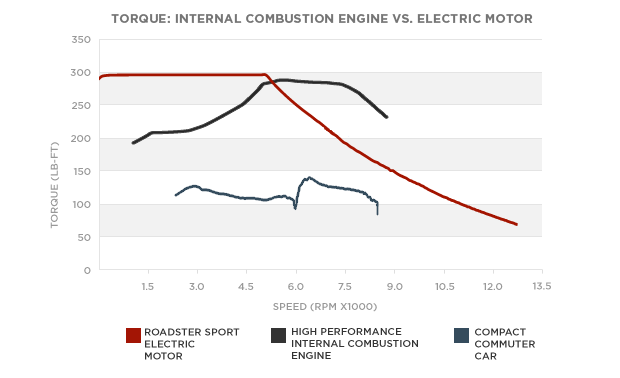

In [7]:
from IPython.display import Image
Image(filename='torque.png')

$$ Design    parameters$$
$$ P=270 kW $$
$$ T=440 Nm$$

hence $$ n=5859 rpm$$ which can be deduced from the torque speed characteristics provided above.

Moreover, from [8], the battery is understood to be composed of 96 series 3.2 V cells making 400 V dc bus voltage. With zero sequence voltage injection techniques, $ 560 V_{rms} $ can be applied to a three-phase induction machine with isolated star point. 

$$ V_{ll}=560 V$$

Hence $$V_{ln}=323 V$$

The machine is specified to be a 4 pole 3 phase induction machine.
Moreover, from the previous link and the open structure of the motor provided in the following link slot number can be inferred as 48:   [2]

Interestingly, the slot number can be counted from the figure provided in [1]. Most probably the figure belongs to the actual motor dimensions.

In [3], the stator slot number and rotor bar number are disclosed explicitly as 48 and 68 respectively. The validity of these numbers are verified from design lecture notes.

Considering the slip and the rated spped of the machine specified abov, the maximum rotating magnetic field speed is 6000 rpm which makes 200 Hz of inverter output voltage fundamental frequency at maximum output voltage.

$$ f=200 Hz $$

target efficiency 0.9
cos phi=0.85



In [8]:
eff=0.93
pf=0.85

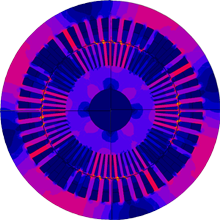

In [9]:
from IPython.display import Image
Image(filename='magflux.png')



Fig. 1 Probably the actual designed induction machine axial view in [1]

###Design of the IM

####Main Dimensions

The tangential stress for the machine is taken as  
$$\sigma_{tan}=20000$$

It is known that the tangential stress multiplied by the surface of the rotor and the diameter gives the desired torque

$$T=\sigma_{tan}(2\pi.r_rl_r)r_r$$

Here $r_r$ refers to the rotor radius
$l_r$ refers to the rotor axial length

Note that the rotor diameter is  $D_r=2r_r $

In [10]:
import math
from __future__ import division
p=270000 #270kW
pp=2 #pole pairs
sigmatan=20000 #selected tangential maxwell stress
T=440  #required torque
pi=math.pi  #pi number
loverDr=1.6  #rotor effective legth over rotor diameter aspect ratio
Dr=math.pow(2*T/(sigmatan*pi*loverDr),1.0/3.0)  #rotor diameter
l=loverDr*Dr #rotor length
print  Dr
print l

0.206091908199
0.329747053118


The airgap legth can be obtained from the approximation for heavy duty asynchronous machines in the book as

In [11]:
lg=1.6e-3*(0.18+0.006*math.pow(p,0.4))
print lg

0.00171629112857


The inner stator diameter $D_{is}$ is

In [12]:
Dis=Dr+2*lg #inner stator diameter
print Dis

0.209524490456


From Table 15.2 of [5] we have $D_{is}$/$D_{out}$=0.61, hence we obtain $D_{out}$ as follows

In [13]:
Dout=Dis/0.61 #outer stator diameter
print Dout

0.343482771239


####Stator Slots and Windings

The stator slot number is $$ Q_s=2*pp*q*m $$ m is phase number, q is number of slot per pole per phase, selecting m=4 we have 

$$ Q_s=48 $$
which is the actual stator slot number in the machine as stated in the aforementioned pharagraphs.

The slot pitch can be obtained as $\tau_s=\pi*D_{is}/Q_s$

In [14]:
Qs=48
tauslot=pi*Dis/Qs
print tauslot

0.0137133458326


which is in the mechanically acceptable range.

After determining the slot number and main dimensions, the winding configuration of the stator is determined. It is general sense to have 5/6 pitch chorded windings to reduce 5th and 7 th harmonics. [7].

In [15]:
m=Qs/3/4
alpha=2*pi*pp/Qs  #electrical angle between slots
kd=math.sin(m*alpha/2)/m/math.sin(alpha/2)
kp=math.sin(pi/2*5/6)
kw=kp*kd
print kw


0.925030648888


In [16]:
Bg=0.7 #air gap flux density within the specified limits
alphai=0.74 #flux  derating factor
Fpp=alphai*Bg*pi*Dis*l/2/pp  ##derated flux per pole
Vln=323  #previously found line to neutral phase voltage
f=200 #200 hz applied frequency
W=Vln/(4.44*f*Fpp*kw)  #number of turns per phase
print Fpp
print W

0.0281083503014
13.9893674239


Number of conductors per slot can be obtained as

In [17]:
q=48/3/2/pp
ns=W/(pp*q)
print ns #number of conductor per slot


1.74867092799


Hence the number of coils per slot is selected as 2.

In [18]:
ns=2
Wnew=pp*q*ns
print Wnew

16.0


the new airgap flux density can be obtained as.

In [19]:
Bg=Bg*W/Wnew
print Bg

0.612034824797


In [20]:
i1=p/3/Vln/eff/pf
print i1

352.482948637


From 15.17 the current density $ J_{cos} $ for the conductors are selected as 4.5 A/mm2

The magnetic wire cross section area is obtained as 

In [21]:
jcos=4.5
Aco=i1/jcos
print Aco  #the required area of the conductor of one phase

78.3295441416


Litz wire scould be more appropriate as the machine is intended to be driven by an inverter. However, in the project, the conductors are selected from standard AWG conductors. the number of parallel conductors should be kept high in order to reduce skin and proximity effects.


In [22]:
ap=48   #number of parallel conductors
dco=math.sqrt(4*Aco/pi/ap)
print dco, 'in mm'  #the diameter of the conductor to be utilized

1.44144222571 in mm


Hence AWG 15 wire is selected.

The flux density in the stator tooth should not be too much. In [5] it is advised to be in the range 1.5 -1.65 T. In the design it is taken Bts = 1.55 T.

In [23]:
kfe=0.96
Bts=1.55
toothw=Bg*tauslot/Bts   #tooth width
print toothw

0.00541486788001


In [24]:
ff=0.44  #fill factor for high power mc in the book
rsa=dco*dco*pi*ap*ns/4/ff   #reqired slot area in mm2
print rsa

356.043382462


Note that the required area is given in terms of mm2. In the figure below, the selected slot shape is illustrated. From the geometry, the slot are can be approximated as $$RSA=Sds[(2*\pi(D_{is}/2+Sds/2)/Q_s)-Ws]$$

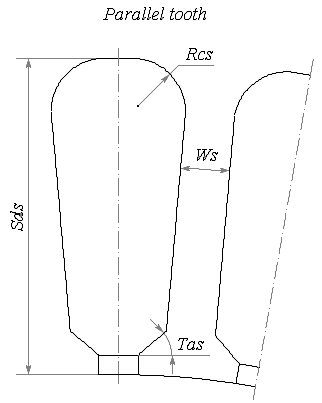

In [25]:
Image(filename='paralleltooth.png')

solving the above equation we get

In [26]:
from sympy import *
init_printing(use_latex=True)
sds=symbols('sds')
solve((pi/Qs)*sds**2+(pi/Qs*Dis-toothw)*sds-0.000001*rsa)


Hence the slot depth is 34 mm. The variables Rcs and Tas are determined by past experience. From the figure below, Ows is selected as 4.5 mm which is lower than 8 times the airgap length.  Ods is selected as 2.5 mm. as we increase Ods too much the leakage inductances will increase, as we make it too small, the mechanical construction will be diffucult and the tooth will be vulnarable to small crashes.

In [30]:
ods=0.0025
ows=0.0045

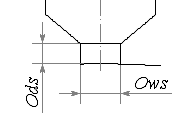

In [31]:
Image(filename='statortooth.png')

Now we proceed in calculating the teeth saturation factor 1+Kst where $Kst=(Fmts+Fmtr)/Fmg$ the ratio of the slot magnetic voltage drop to the airgap magnetic voltage drop. The airgap magnetic voltage drop can be calculated as

In [32]:
nuzero=4*math.pi*1e-7
Fmg=1.2*Bg*lg/nuzero
print Fmg ,'ampere turns'

1003.0867041 ampere turns


and $Fmts$ should be calculated by making use of the lamination sheet characteristics provided in the book, the stator tooth flux density was intended to be 1.55 T. From table 15.4 corresponding magnetic field intensity can be read as 1760 A/m.

In [33]:
sds=0.034
hstooth=1760
fmts=(sds+ods)*hstooth
print fmts

64.24


In [34]:
kst=0.4
fmtr=kst*Fmg-fmts
print fmtr

336.99468164


In [35]:
fmtr=fmts

The magnetic voltage drop in the rotor tooth $Fmtr$ is greater than the stator tooth when we want to tooth saturation factor to be met. However, the rotor mtoot magnetic voltage drop can be made equal to that of stator so that the effective airgap length is reduced. As we inserted slots into the stator, the utilization of the backcore of the stator is reduced. Hence the flux density in the back core should be checked and redesigned if necessary.

In [36]:
hback=Dout/2-sds
print hback

0.13774138562


In [37]:
Fpp=alphai*Bg*math.pi*Dis*l/2/pp  ##new derated flux per pole
Bs=Fpp/hback/l/2
print Bs

0.270544111217


###Rotor slots

In [38]:
Qr=68.0 # rotor slot number
ir=2.0*3*Wnew*kw*i1/Qr # rotor bar current ki parameter is taken as 1 so it is not written
jr=4 # current density is taken smaller than stator current density as the cooling of rotor is more difficult
rears=ir/jr # required area for rotor slot
print rears,'in mm2'

115.079128482 in mm2


The rotor tooth flux density is selected to be 1.6 T. 

In [39]:
tauslotr=math.pi*(Dis-2*lg)/Qr  #slot pitch
print tauslotr

0.00952142389355


In [40]:
wr=tauslotr*Bg/1.5/0.96
print wr    #rotor tooth width

0.00404683541979


The rotor slot geometry is selected as in the following figure.

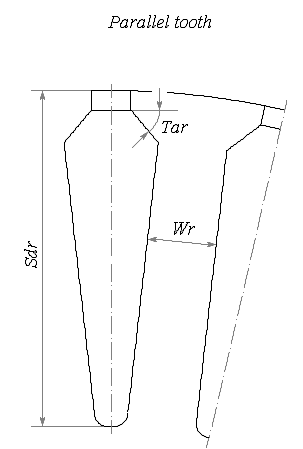

In [41]:
Image(filename='rotorslot.png')

Here the same approach for finding stator slot depth is utilized.

In [42]:
from sympy import *
init_printing(use_latex=True)
sdr=symbols('sdr')
solve((-pi/Qr)*sdr**2+(pi/Qr*Dis-wr)*sdr-0.000001*rears)


Obviously 2.5 cm slot depth is the logical one. Tar is selected as 60 degrees.
The parameters shown below Owr and Odr are selected as 3.5 mm and odr 2.5 mm respectively.

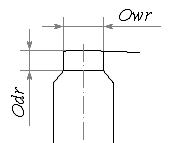

In [43]:
Image(filename='rotortooth.png')

The rotor slot magnetic voltage drop then can be calculated as 

In [51]:
sdr=0.025 #in m
Fmtr=sdr*1340
print Fmtr

33.5


calculated fmtr is less than previously estimated. So there is no need to increase the rotor tooth width. The rotor back core requirement should be also checked. the maximum backcore length can be obtained as;

In [52]:
Bcr=1.65
hcr=Fpp/2/l/Bcr
print hcr, 'in meters'

0.0225849216668 in meters


The maximum diameter of the shaft is then

In [53]:
dshaftmax=Dis-2*(sdr+hcr)
print dshaftmax

0.114354647122


a shaft diameter of 0.05 meters will be sufficient to carry the torque.
As the densities of the copper and the iron are very close to each other, total mass calculation can be roughly made by multiplying the density and the total volume.

In [59]:
density=7874  #kg/m3
totvol=math.pi*Dout*Dout*l/4
totmass=density*totvol
print totmass, 'kg'

240.589201724 kg


Moreover, the rotatonal inertia of the rotor can be found as

In [60]:
Jrot=totmass*Dis*Dis/2
print Jrot

5.2809945808


###Results

Simulation results

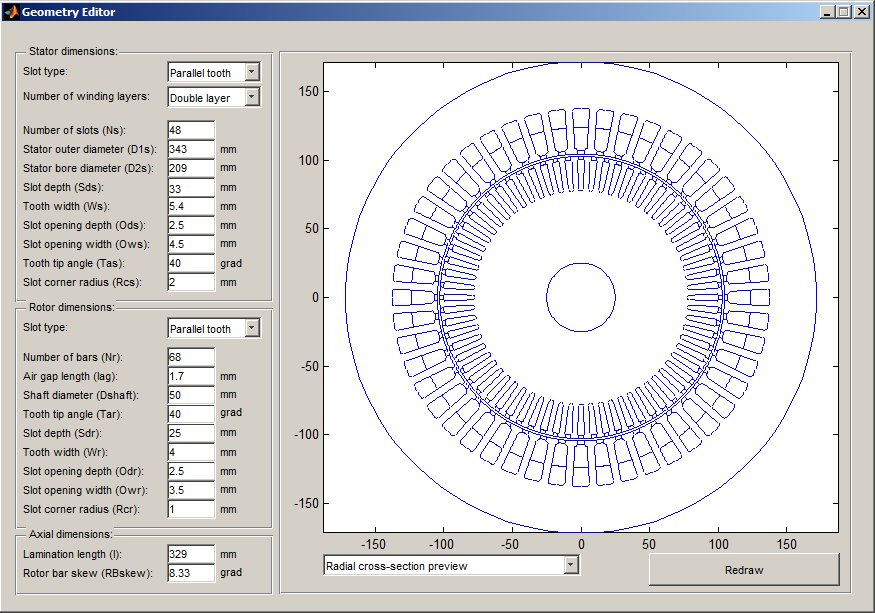

In [69]:
Image(filename='geometry.png')

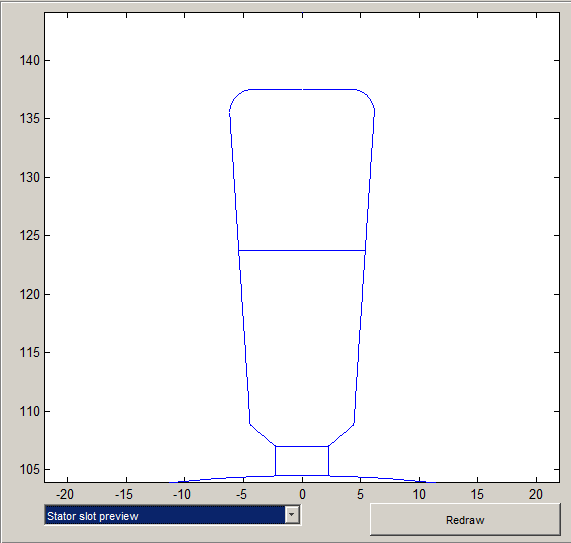

In [70]:
Image(filename='statorslot.png')

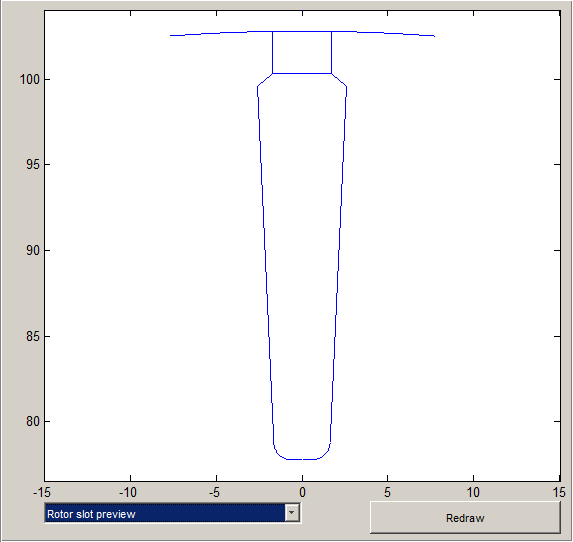

In [71]:
Image(filename='rotorslotview.png')

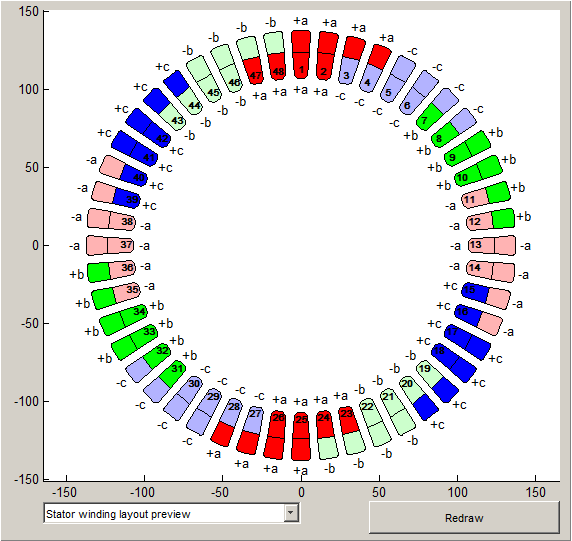

In [72]:
Image(filename='statorwinding.png')

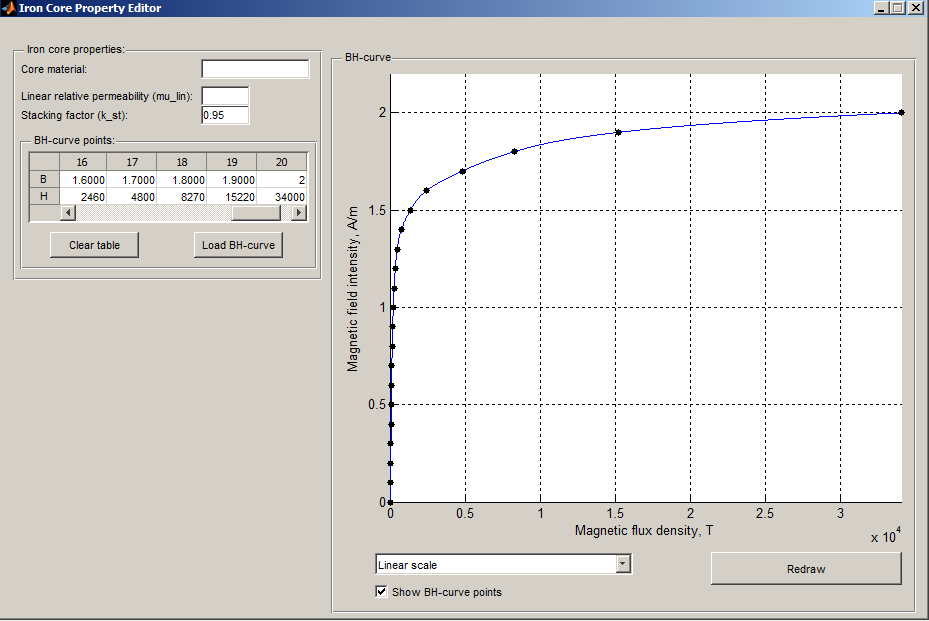

In [73]:
Image(filename='bhcurve.png')

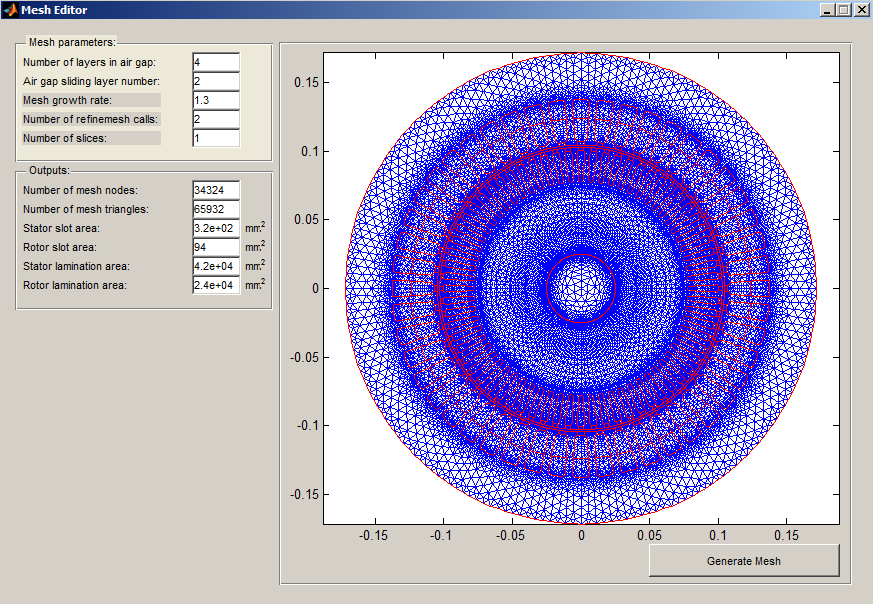

In [74]:
Image(filename='mesh.png')




###Conclusion
###References
[1]http://my.teslamotors.com/roadster/technology/motor

[2]https://www.youtube.com/watch?v=NaV7V07tEMQ

[3]http://sites.ieee.org/miami/files/2014/11/Hendershot-FIU-Lecture.pdf

[4] http://www.ens.dk/sites/ens.dk/files/klima-co2/transport/elbiler/IA-HEV_EVI/Konference_22_maj_2014/peter_bardenfleth-hansen_tesla_motors.pdf

[5]I. Boldea and S.A. Nasar, "The Induction Machine Handbook", CRC Press LLC, 2002.

[6] Juha Pyrhonen, Tapani Jokinen, Valeria Hrabovcova, 2009

[7] A. Tessarolo "Design Criteria for Stator Winding Coil Pitch Choice in AC
Inverter-Fed Multi-Phase Motors"

[8] https://www.advancedautobat.com/industry-reports/2014-Tesla-report/Extract-from-the-Tesla-battery-report.pdf